# Weak Ties & Small-World Demo

This notebook builds a **planar random geometric graph** in a rectangle, animates a BFS-like **signal propagation** from the lower-left to the upper-right corner, then **adds a few long-range edges** and repeats the animation to show how shortcuts speed things up.

**Outputs written to the working directory.**

In [58]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.collections import LineCollection
import imageio
import math
import random
%load_ext autoreload
%autoreload 2

# ---------- Parameters (tweakable) ----------
SEED = 7
N = 500                   # number of nodes
WIDTH, HEIGHT = 1.6, 1.0  # rectangle dimensions
AREA = WIDTH * HEIGHT
ALPHA = 1.7               # radius multiplier (higher → denser, faster diffusion)
LONG_TIES_K = 12          # number of long-range edges to add
MIN_LONG_DIST_FRAC = 0.6  # min fraction of rectangle diagonal for a "long" tie
FIGSIZE = (10, 6)         # figure size
NODE_SIZE = 10            # base node size in scatter
EDGE_WIDTH = 0.5          # base edge width
LONG_EDGE_WIDTH = 2.2     # width for long ties
DPI = 150                 # resolution for saved images
GIF_FRAME_SEC = 0.3       # seconds per frame in GIF animations

rng = np.random.default_rng(SEED)
random.seed(SEED)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from weak_ties_illustration_utils import *

## Build base graph
Create the random geometric graph, find corner nodes, and compute the baseline shortest path.

In [60]:
# Build the base graph
G, pos, r = make_rgg(N, WIDTH, HEIGHT, ALPHA)
src, dst = corner_nodes(pos, WIDTH, HEIGHT)

# Baseline shortest path
path_base = nx.shortest_path(G, src, dst)
print(f"Baseline path length (hops): {len(path_base)-1}, radius ~ {r:.3f}")


Baseline path length (hops): 16, radius ~ 0.956


## Image 1: Random Geometric Graph

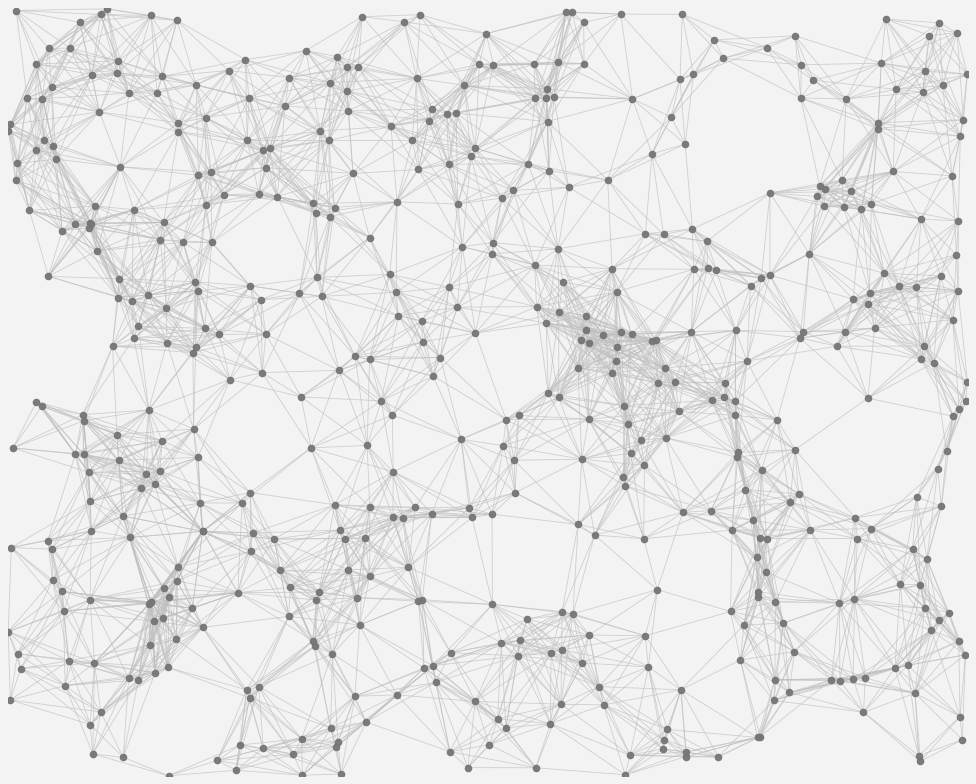

In [61]:
img1_path = "images/img1_geometric_graph.png"
title1 = f"Image 1: Random Geometric Graph (r≈{r:.3f}), path length {len(path_base)-1}"
draw_graph_image(G, pos, title1, img1_path)
from IPython.display import Image, display
display(Image(filename=img1_path))


## Animation 1: Signal propagation (no long ties)

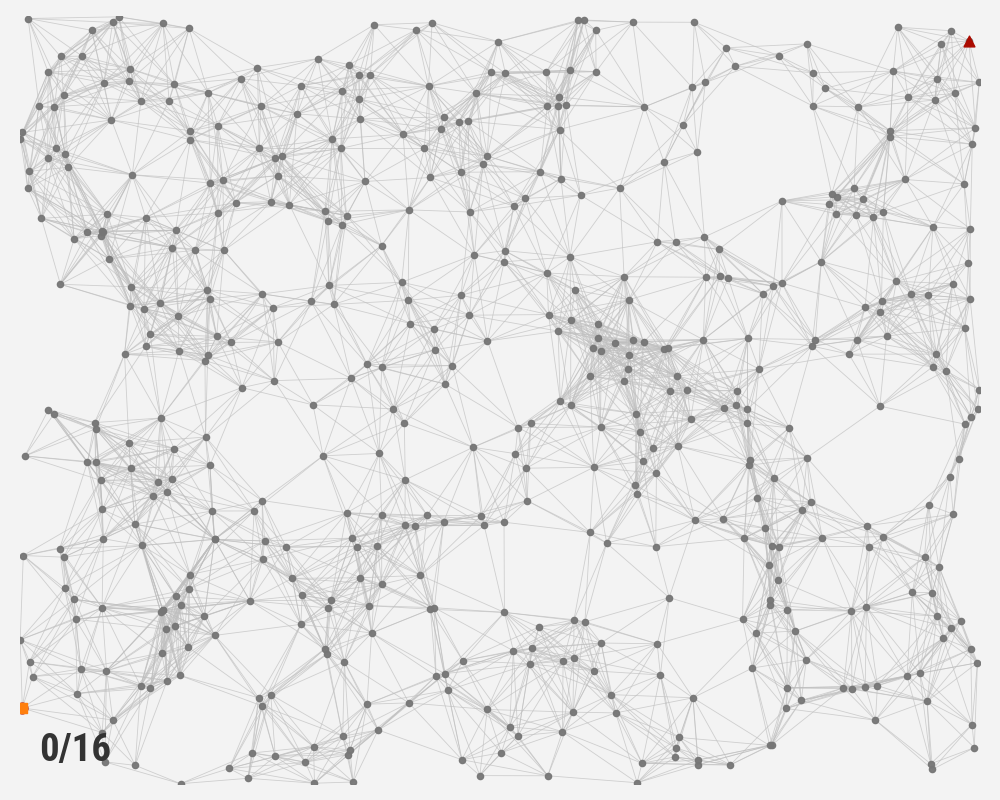

In [62]:
anim1_path = "images/anim1_signal.gif"
animate_signal(G, pos, src, dst, anim1_path)
from IPython.display import Image, display
display(Image(filename=anim1_path))


## Add long-range ties and redraw

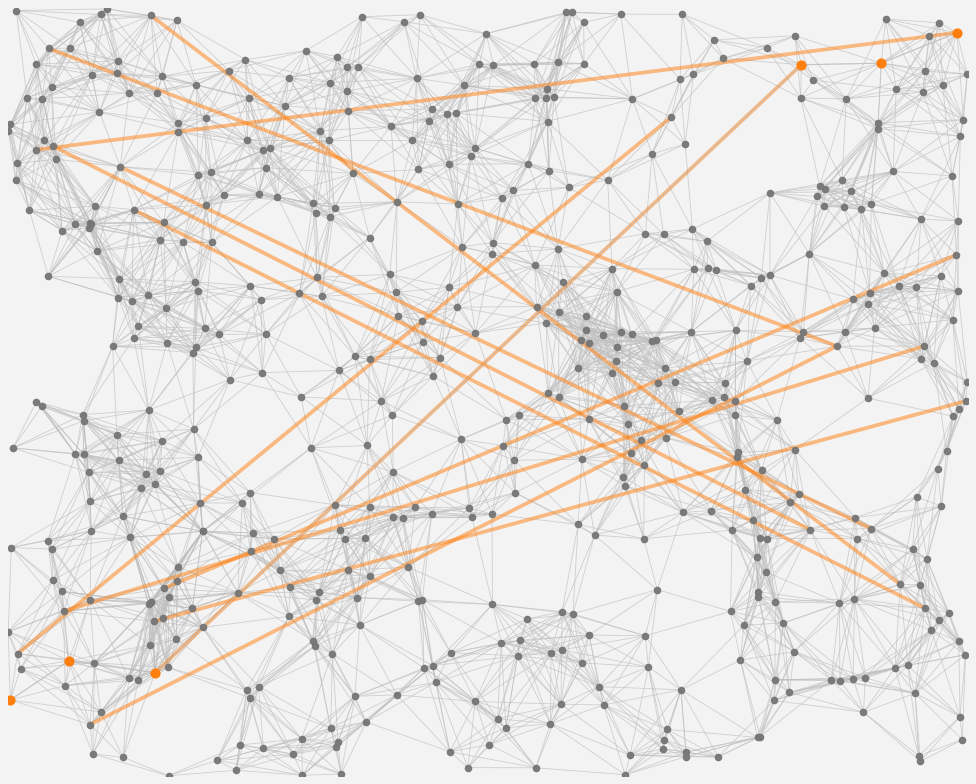

New shortest path length (hops): 5


In [63]:
# Add long-range edges
long_edges = add_long_ties(G, pos, LONG_TIES_K, min_frac_of_diag=MIN_LONG_DIST_FRAC)
path_with_long = nx.shortest_path(G, src, dst)

img2_path = "images/img2_with_long_ties.png"
title2 = f"Image 2: With {len(long_edges)} long-range edges, path length {len(path_with_long)-1}"
draw_graph_image(G, pos, title2, img2_path, long_edges=long_edges, highlight_path=path_with_long)

from IPython.display import Image, display
display(Image(filename=img2_path))
print("New shortest path length (hops):", len(path_with_long)-1)


## Animation 2: Signal propagation with long ties

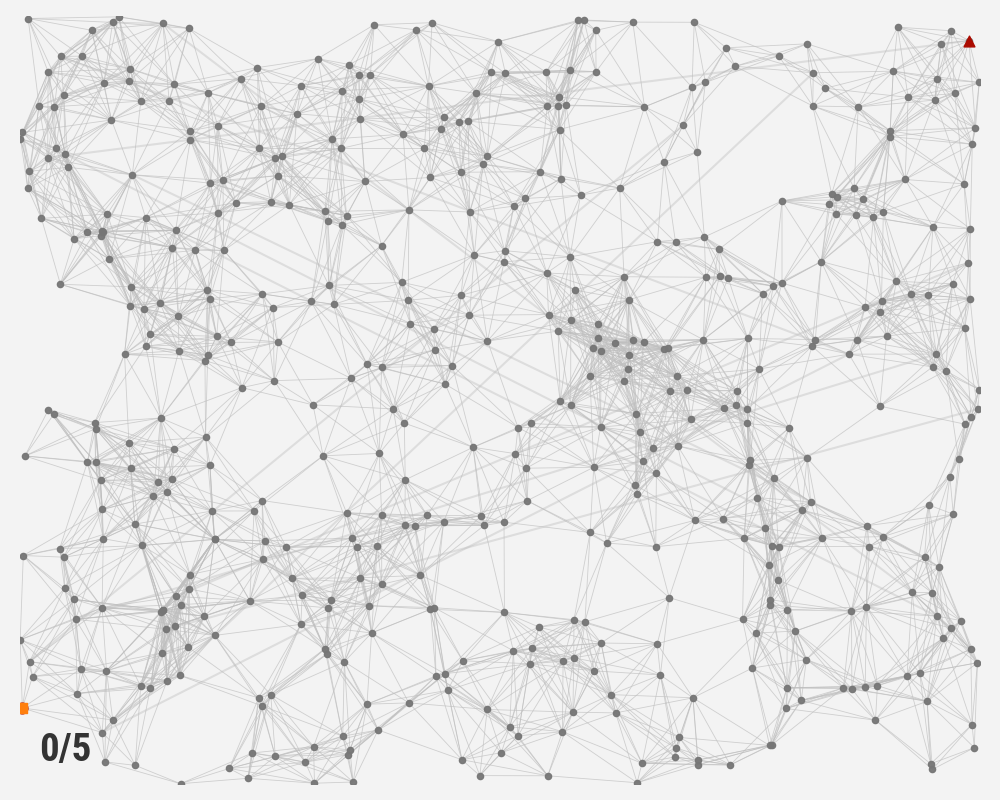

In [64]:
anim2_path = "images/anim2_signal_with_long_ties.gif"
animate_signal(G, pos, src, dst, anim2_path, long_edges=long_edges)
from IPython.display import Image, display
display(Image(filename=anim2_path))


### Summary
- `Image 1` shows the base geometric graph and baseline shortest path length.
- `Animation 1` shows BFS wavefront propagation without any long ties.
- `Image 2` overlays a handful of long-range edges and highlights the new shortest path.
- `Animation 2` shows the (faster) propagation with those shortcuts.